In [1]:
%run c://Users/a/apython/__init__/Normal_for_DSS.py

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

In [9]:
# load image file
""" put your path in here!!!


"""
All = pd.read_csv("C:/Users/a/GitHub/ldata/fer2013/all.csv")

#cut and paste image data part.
All_ar = np.array(All.iloc[:,3:])
All_img = All_ar.reshape(35887,48,48)
All_emo = All.emotion
All_test = All[ All.Usage != "Training"]
#test_img = np.fromfile("test.csv")


from keras.models import load_model
#put your test file here
test =np.array(All_test.iloc[:,3:])
test_x = test.reshape(-1,48,48,1)
#put your test y here
test_y = np.array(All_test.iloc[:,1])

#define drawing functions.
def draw(k):
    plt.imshow(All_img[k].astype('float32'), cmap="gray")
    plt.show()
    
def draw_(k):
    plt.imshow(All_img[k].astype('float32'), cmap="gray")

def draw_list(list_):
    a = len(list_)
    plt.figure(figsize=(18, a/1.3))
    for i in range(a):
        plt.subplot(a//6+1,6,i+1)
        draw_(list_[i])

        plt.grid(b=False)
    plt.tight_layout()
    plt.show()
    
    
def draw_result(list_):
    """
    draw the bunch of images for indexes in list_
    if you put Tr in list draw all predicted true
       ..      Fa             ..             False
       ..      Al             ..             All
       other wise... free to choose your ..;; 
    """
    a = len(list_)
    plt.figure(figsize=(18, (3*a)//6+1))
    for i in range(a):
        plt.subplot(a//6+1,6,i+1)
        draw_(list_[i])
        plt.title("org: %d ->prd: %d"% (fin.test_y[list_[i]], fin.pred_y[list_[i]]),size =25)
        plt.grid(b=False)
    plt.tight_layout()
    plt.show()

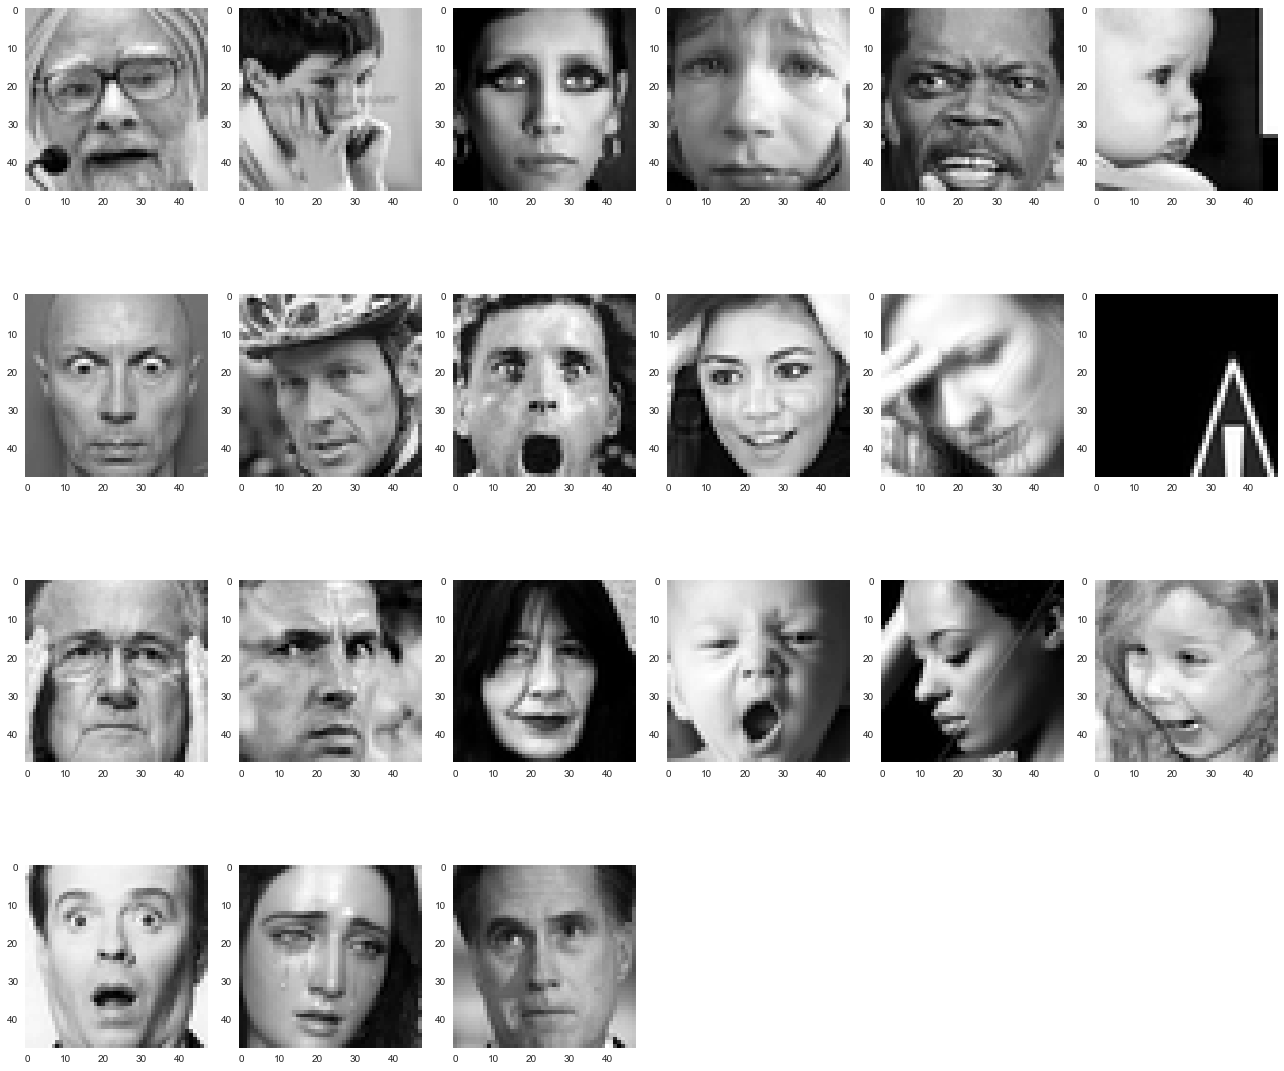

In [10]:
draw_list([1,3,4,6,10,12,15,19,29,39,49,59,69,79,119,1119,129,139,149,159,169])

In [4]:
%time
draw_result(Fa[:100])

Wall time: 0 ns


NameError: name 'Fa' is not defined

In [38]:
draw_result(Al[:100])

In [ ]:
draw_result(Tr[:100])

In [5]:


fin = pd.DataFrame({"pred_y":pred_y,"test_y":test_y,"ind":range(len(pred_y))})
T = fin["pred_y"] == fin["test_y"]
F = fin["pred_y"] != fin["test_y"]
Tr = fin.ind[T].values
Fa = fin.ind[F].values
Al = fin.ind.values




NameError: name 'pred_y' is not defined

In [10]:
def result_show0():
    plt.figure(figsize=(16,16))
    
    plt.subplot(221)
    sns.barplot(fin["test_y"].value_counts().index,fin["test_y"].value_counts().values)
    plt.title("Total number of each category", size = 20)
    plt.ylabel("Num",size=20)
    plt.xlabel("Category", size = 20)
    
    plt.subplot(222)
    sns.barplot(fin["test_y"].value_counts().index, fin["test_y"].value_counts().values,alpha=0.5)
    sns.barplot(fin["test_y"].value_counts().index, fin[T]["test_y"].value_counts().values ) 
    plt.title("Prediction True number vs tot number",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    
    plt.subplot(223)
    sns.barplot(fin["test_y"].value_counts().index, [1,1,1,1,1,1,1], alpha=0.5)
    sns.barplot(fin["test_y"].value_counts().index, (fin[T]["test_y"].value_counts().values)/(fin["test_y"].value_counts().values))
    plt.title("True ratio of each category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("ratio",size=20)
   
    
    plt.tight_layout()
    plt.show()
    

In [11]:
result_show0()

NameError: name 'fin' is not defined

In [92]:
fin[fin.test_y == 0]["pred_y"].value_counts()

0    491
2    151
6    132
4    116
3     49
5     19
Name: pred_y, dtype: int64

In [106]:
#define a_mask
a_mask = np.ones((7,7)) * 0.5
for i in range(7):
    for j in range(7):
        if i == j:
            a_mask[i][j] = 1.
a_mask

array([[ 1. ,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  1. ,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  1. ,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  1. ,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  1. ,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  1. ,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  1. ]])

In [87]:
result_num = np.arange(49).reshape(7,7)
for i in range(7):
    for j in range(7):
        result_num[j][i] = fin[fin.test_y == i][fin.pred_y==j].ind.count()
result_num

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


array([[ 491,   49,  123,   69,  165,   22,  122],
       [   0,   25,    0,    0,    0,    0,    0],
       [ 151,   21,  451,   75,  275,  120,  136],
       [  49,    5,   49, 1393,  101,   46,  111],
       [ 116,    7,  165,   63,  443,   15,  141],
       [  19,    1,   88,   41,   20,  599,   23],
       [ 132,    3,  148,  133,  243,   29,  700]])

In [112]:
plt.subplot(111)
sns.barplot([0,1,2,3,4,5,6],result_num[0],alpha = 1)
for i in range(6):
    sns.barplot([0,1,2,3,4,5,6],result_num[i+1],alpha = 1)
plt.show()

TypeError: barplot() got multiple values for argument 'y'